In [1]:
import pandas as pd
import os
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
h5 = pd.HDFStore("CAPSDB.h5")

In [3]:
h5.keys()

['/caps_descriptors', '/cluster2MA', '/cluster_descriptors']

In [4]:
capsd = h5.get("caps_descriptors")
cluster = h5.get("cluster2MA")
clusterd = h5.get("cluster_descriptors")

In [5]:
#capsd.shape
capsd.head()

,nid,capID,pdbid,chain,type,start,end,startcap,endcap,lengthCAP,lengthHELIX,D,delta,seq,ss
0,1,4kyc_A_Nt2,4kyc,A,Nt,66,72,66,66,1,6,3.973,20.076,RFGGYAQ,GHHHHHH
1,2,2vch_A_Nt4,2vch,A,Nt,123,129,123,123,1,6,3.642,17.662,AFDVAVE,GHHHHHH
2,3,4g7s_A_Nt8,4g7s,A,Nt,205,212,205,207,3,5,3.899,14.696,VLFLLPWS,--THHHHH
3,4,3ezi_A_Nt3,3ezi,A,Nt,107,116,107,109,3,7,3.648,8.470,RNELIPALMR,--THHHHHHH
4,5,4quk_A_Nt5,4quk,A,Nt,99,117,99,101,3,16,3.707,16.268,AELIDPALKGTLNVLNSCA,--THHHHHHHHHHHHHHHH


In [7]:
cluster.head()

,nidcl,nidcap,start,end,seq,ss,rama
0,1,81,273,277,NPEAL,SHHHH,baaaa
1,1,5343,52,56,NPSVD,-HHHH,baaaa
2,1,1205,331,335,NPMAA,-HHHH,baaaa
3,1,1326,250,254,NPASN,-HHHH,baaaa
4,1,1393,330,334,NPTYL,-HHHH,xaaaa


In [8]:
clusterd.head()

,nidcl,clID,type,Ncaps,lengthCAP,D,delta,c_seq,c_ss,c_rama,pattern,pattern_entropy,rmsd_av,rmsd_std,seq_id_av,seq_id_std
0,1,Cluster_1_0,Nt,1311,1,6.255,76.370,pXXXh,CHHHH,Baaaa,[adegknqrst]:x:[adegknqrst]:x:[acfgilmvwy],1.620:-0.977:0.161:-0.593:-0.212,0.201,0.174,8.9,14.9
1,2,Cluster_1_1,Nt,189,1,5.543,40.235,XXXXX,CHHHH,aaaaa,x:[adegknqrst]:x:x:x,-0.782:1.363:-0.363:-0.938:0.721,0.492,0.266,7.9,14.6
2,3,Cluster_1_2,Nt,155,1,6.345,78.733,GXXXh,CHHHH,eaaaa,[GT]:x:[adegknqrst]:x:[acfgiklmtv],1.785:-0.515:-0.375:-0.508:-0.387,0.212,0.185,26.7,22.3
3,4,Cluster_1_3,Nt,134,1,6.285,68.665,XXXXh,CHHHH,baaaa,x:x:x:x:[acfgilmvwy],-1.226:0.804:0.372:-0.900:0.949,0.233,0.205,7.6,14.0
4,5,Cluster_1_4,Nt,86,1,5.844,42.471,XXXXX,THHHH,gaaaa,[degknqr]:[acfgiklmtv]:x:[adegknqrt]:x,1.730:-0.252:-0.835:-0.184:-0.460,0.168,0.158,13.6,19.0


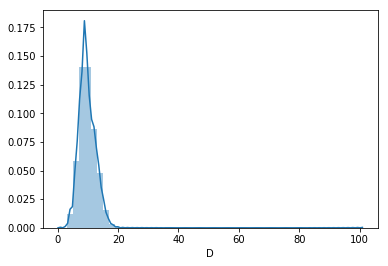

In [27]:
sb.distplot(capsd.D)

/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


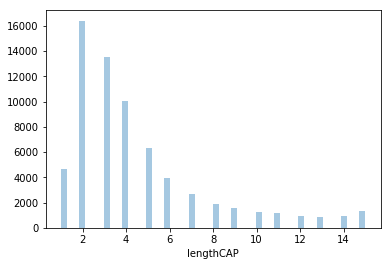

In [8]:
sb.distplot(capsd.lengthCAP, kde=False)

In [9]:
import numpy as np
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson

In [13]:
capsd.lengthCAP.count()

67530

In [ ]:
fam = Poisson()
ind = Independence()
model1 = GEE.from_formula("y ~ age + trt + base", "subject", data, cov_struct=ind, family=fam)
result1 = model1.fit()
print(result1.summary())

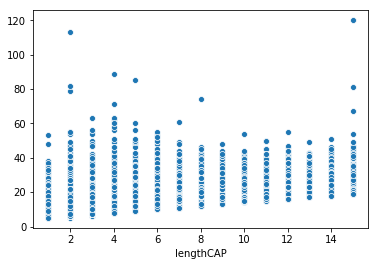

In [6]:
sb.scatterplot(x=capsd.lengthCAP, y=capsd.lengthHELIX+capsd.lengthCAP)

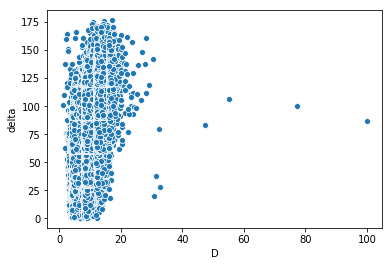

In [39]:
sb.scatterplot(x=capsd.D, y=capsd.delta)

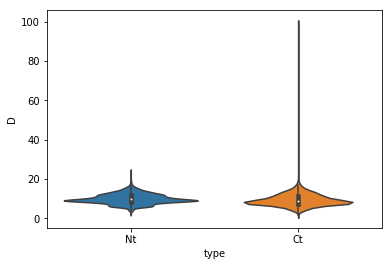

In [36]:
sb.violinplot(x=capsd.type, y=capsd.D)

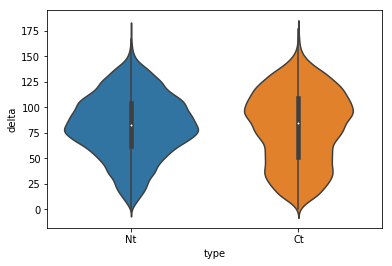

In [37]:
sb.violinplot(x=capsd.type, y=capsd.delta)

([array([10833.,  6243.,  8215.,  2027.,  1325.,  1794.,   719.,  1250.,
           477.,  1324.]),
  array([10264.,  7261.,  8181.,  1920.,  1314.,  1622.,   554.,   863.,
           411.,   933.])],
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 2 Lists of Patches objects>)

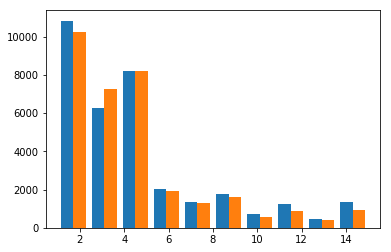

In [19]:
#sb.violinplot(x=capsd.type, y=capsd.lengthCAP)
plt.hist([capsd.lengthCAP[capsd.type == 'Nt'], capsd.lengthCAP[capsd.type == 'Ct']])

In [17]:
capsd.columns

Index(['nid', 'capID', 'pdbid', 'chain', 'type', 'start', 'end', 'startcap',
       'endcap', 'lengthCAP', 'lengthHELIX', 'D', 'delta', 'seq', 'ss'],
      dtype='object')

In [43]:
# bad data evident in the large D values
capsd[capsd.D > 50]

,nid,capID,pdbid,chain,type,start,end,startcap,endcap,lengthCAP,lengthHELIX,D,delta,seq,ss
8496,67528,2hfp_B_Ct0,2hfp,B,Ct,605,425,421,425,5,7,99.999,86.541,KILHRLLQEGS,HHHHHHHSSS--
8497,67529,1eex_G_Ct6,1eex,G,Ct,150,-2,-8,-2,7,16,77.389,99.855,KICAAFVREAATLYVERKKLKG,HHHHHHHHHHHHHHHHTT-STT-
8498,67530,4pje_E_Ct0,4pje,E,Ct,182,413,402,413,12,4,55.215,106.459,CANAFNNSIIPEDTF,HHHHTTTS---TT-B-


In [52]:
capsd[capsd.start > capsd.end].head()

,nid,capID,pdbid,chain,type,start,end,startcap,endcap,lengthCAP,lengthHELIX,D,delta,seq,ss
4655,34293,2w2k_A_Ct13,2w2k,A,Ct,310,-2,-16,-2,15,20,3.773,21.689,IETFHEFERLTMTNIDRFLLQGKPLLTPAGKVFAP,HHHHHHHHHHHHHHHHHHHHT----SSB-S-----E
4683,34321,4cic_A_Ct3,4cic,A,Ct,76,47,47,47,1,8,2.489,53.300,VGDIIRVL,HHHHHHHH-
5018,34656,4mcd_A_Ct5,4mcd,A,Ct,142,81,76,81,6,12,2.404,117.097,ELPAMTLIDAVARFIPG,HHHHHHHHHHHHTTSTT-
5025,34663,3qyf_A_Ct13,3qyf,A,Ct,257,247,244,247,4,7,2.959,149.606,DWVRKLLGIY,HHHHHHHTTT-
5098,34736,1g5h_A_Ct9,1g5h,A,Ct,316,-2,-2,-2,1,12,7.432,15.859,VDLGTLAYLYDSF,HHHHHHHHHHHH-E


In [15]:
capsd[capsd.startcap < 0]

,nid,capID,pdbid,chain,type,start,end,startcap,endcap,lengthCAP,lengthHELIX,D,delta,seq,ss
4655,34293,2w2k_A_Ct13,2w2k,A,Ct,310,-2,-16,-2,15,20,3.773,21.689,IETFHEFERLTMTNIDRFLLQGKPLLTPAGKVFAP,HHHHHHHHHHHHHHHHHHHHT----SSB-S-----E
5098,34736,1g5h_A_Ct9,1g5h,A,Ct,316,-2,-2,-2,1,12,7.432,15.859,VDLGTLAYLYDSF,HHHHHHHHHHHH-E
249,39457,3v9w_A_Ct6,3v9w,A,Ct,183,-2,-7,-2,6,21,7.569,57.902,ALYDTERTAVLFCEIVNRWKRLGGWP,HHHHHHHHHHHHHHHHHHHHHTT-SS-
330,39538,4c7g_A_Ct13,4c7g,A,Ct,475,-2,-13,-2,12,7,4.661,57.761,APHWEAMGIDYYRSPQVP,HHHHHHHT------TTS--
3368,42576,2i5h_A_Ct4,2i5h,A,Ct,171,-2,-11,-2,10,14,7.531,68.444,PEKLIVSRIIYEIKNPQTKYKLF,HHHHHHHHHHHHHH-TTSS--SS-
6043,45251,1gqi_A_Ct21,1gqi,A,Ct,686,-2,-16,-2,15,10,7.021,97.598,LEYYKMLARTTYVPEPWHPASSSRV,HHHHHHHHHHS----SSSGGGG---E
6206,45414,4lob_A_Ct4,4lob,A,Ct,67,-2,-3,-2,2,22,8.726,8.927,MQNAQRLAAIIEMLHTATLVHDDV,HHHHHHHHHHHHHHHHHHHHHHT-E
7239,46447,4j99_A_Ct1,4j99,A,Ct,572,-2,-4,-2,3,6,8.014,15.976,LREYLRAR,HHHHHHTT-
8367,47575,4kf3_A_Ct2,4kf3,A,Ct,40,-2,-4,-2,3,14,10.439,42.599,ATDRCCYVHKCCYKKLT,HHHHHHHHHHHHHHT--E
547,49885,2q9r_A_Ct10,2q9r,A,Ct,176,-2,-9,-2,8,14,9.652,33.578,AELVKGLRKDIIETGVSNIGI,HHHHHHHHHHHHHH---TTS--
